Human Stress detection in and through sleep


-----------------------------------------------------------------------------------------------------------------------

Importing the Libraries

In [1]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

#pickle
import pickle

#os
import os

# using the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\msari\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


___
Reading and analysing the Dataset

In [2]:
# read the dataset
df = pd.read_csv("stress.csv")

# print main features
print('''
Main Features:
sr - snoring rate
rr - respiration rate
t - body temperature
lm - limb movement
bo - blood oxygen
rem - eye movement
sh - sleeping hours
hr - heart rate
sl - stress level
''')


Main Features:
sr - snoring rate
rr - respiration rate
t - body temperature
lm - limb movement
bo - blood oxygen
rem - eye movement
sh - sleeping hours
hr - heart rate
sl - stress level



In [3]:
# head of the dataset
print("First five rows of the dataset:")
df.rename(columns = {'sr.1':'sh'}, inplace=True)
df.head()

First five rows of the dataset:


,sr,rr,t,lm,bo,rem,sh,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
#info and description
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sh      630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


,sr,rr,t,lm,bo,rem,sh,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [5]:
# shape of the dataset
print("Shape of the Dataset :", df.shape)

# different stress levels present in this Dataset
print("Different stress levels present in this Dataset",*sorted(df.sl.unique()))

# count of stress levels present in this Dataset
print("Count of stress levels present in this Dataset",df.sl.value_counts(),sep='\n')

#column names in this dataset
print("Column names in this dataset",*list(df.columns))

Shape of the Dataset : (630, 9)
Different stress levels present in this Dataset 0 1 2 3 4
Count of stress levels present in this Dataset
3    126
1    126
0    126
2    126
4    126
Name: sl, dtype: int64
Column names in this dataset sr rr t lm bo rem sh hr sl


In [6]:
# checking if there is any missing value present in the dataset
if not df.isnull().values.any():
    print("No null values!")
else:
    print("NULL values present")
print(df.isnull().sum())

No null values!
sr     0
rr     0
t      0
lm     0
bo     0
rem    0
sh     0
hr     0
sl     0
dtype: int64


______
Descriptive Statistics

In [7]:
#avg values
print("Average amount of sleep (median):",df.sh.median())
print("Average amount of stress (median):",df.sl.median())

Average amount of sleep (median): 3.5
Average amount of stress (median): 2.0


Text(0, 0.5, 'Sleep hours')

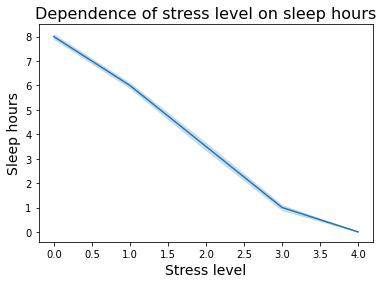

In [8]:
#stress level vs sleep hrs
sleep_hours_plot = sns.lineplot(data=df, x='sl',y='sh')
sleep_hours_plot.axes.set_title("Dependence of stress level on sleep hours", fontsize=16)
sleep_hours_plot.set_xlabel("Stress level", fontsize=14)
sleep_hours_plot.set_ylabel("Sleep hours", fontsize=14)

Text(0, 0.5, 'Heart rate')

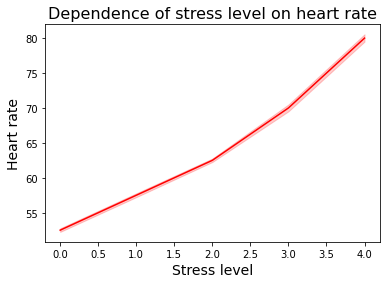

In [9]:
#stress level vs heart rate
heart_rate_plot = sns.lineplot(data=df, x='sl',y='hr', color='red')
heart_rate_plot.axes.set_title("Dependence of stress level on heart rate", fontsize=16)
heart_rate_plot.set_xlabel("Stress level", fontsize=14)
heart_rate_plot.set_ylabel("Heart rate", fontsize=14)

Text(0, 0.5, 'Blood oxygen')

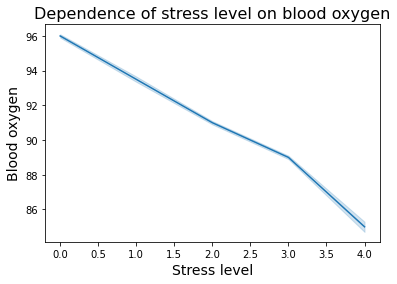

In [10]:
#stress level vs blood oxygen 
blood_oxygen_plot = sns.lineplot(data=df, x='sl',y='bo')
blood_oxygen_plot.axes.set_title("Dependence of stress level on blood oxygen", fontsize=16)
blood_oxygen_plot.set_xlabel("Stress level", fontsize=14)
blood_oxygen_plot.set_ylabel("Blood oxygen", fontsize=14)

In [ ]:
#To find the Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),linewidth=0.1,annot=True,cmap='winter')
plt.show()
plt.savefig('correlationfigure')

In [ ]:
#to pictographically represent the attribute values 
df.hist(figsize=(12,12))
plt.savefig('featuresplot')

_________________________
Predictive Modelling

In [11]:
# split the Dataset for Predictive Modelling

y = df['sl']
x = df.drop(['sl'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (630, 8)
Shape of y: (630,)


In [12]:
# lets create Training and Testing Sets for Validation of Results

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (504, 8)
The Shape of x test: (126, 8)
The Shape of y train: (504,)
The Shape of y test: (126,)


In [13]:
#for final evalutions

def evaluator(y_test, y_pred):    
    # Accuracy
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    # Classification Report
    print('\nClassification Report: \n',classification_report(y_test,y_pred))
    #Confusion Matrix
    print('Confusion Matrix: \n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(6,6),show_normed=True)
    plt.title('Confusion Matrix ', fontsize = 15)
    plt.show()


KNN scores

Accuracy is:  1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Confusion Matrix: 



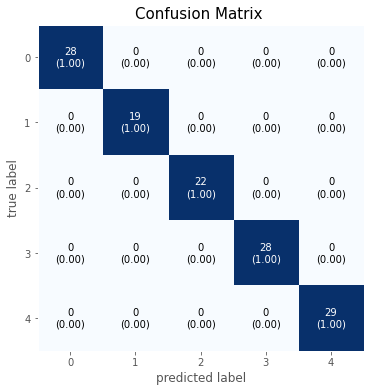


____________________________________________________________________________________________________


DT scores

Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



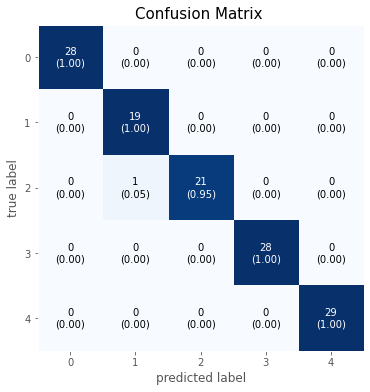


____________________________________________________________________________________________________


RFC scores

Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



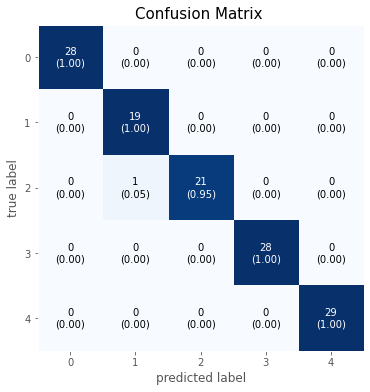


____________________________________________________________________________________________________


GBC scores

Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



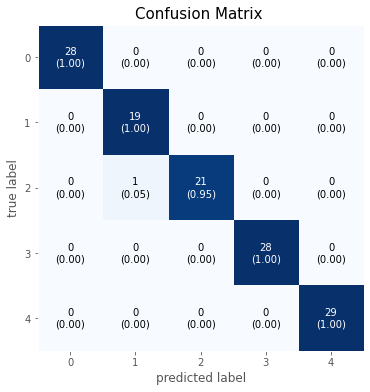


____________________________________________________________________________________________________

[01:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGB scores

Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        22
           3       0.97      1.00      0.98        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



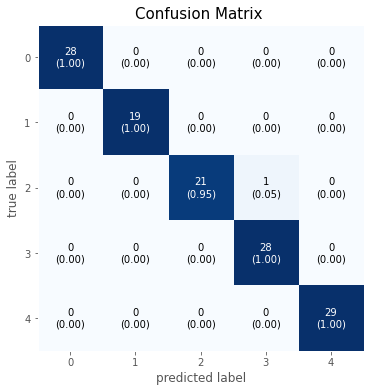


____________________________________________________________________________________________________



In [14]:
# lets create a Predictive Models

model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {
          "KNN" : KNeighborsClassifier(),
          "DT" : DecisionTreeClassifier(),
          'RFC' : RandomForestClassifier(),
          'GBC' : GradientBoostingClassifier(),
          'XGB' : XGBClassifier()
          }

for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("\n" + test + ' scores\n')
    evaluator(y_test, y_pred)
    print('\n','_' * 100,"\n",sep="")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)

In [15]:
#Model accuracies 
model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
0,KNN,1.0,1.0
1,DT,0.992063,1.0
2,RFC,0.992063,1.0
3,GBC,0.992063,1.0
4,XGB,0.992063,1.0


KNN overfits. Decision Tree is ok to use.

_________________________________________________________________

Constructing the best Decision Tree Classifier

Training accuracy:  1.0
Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



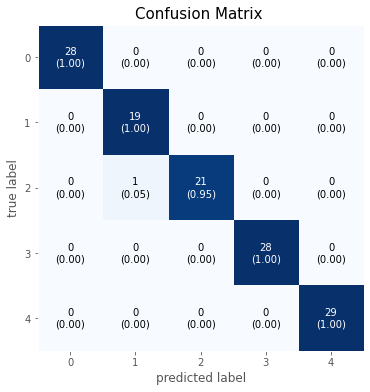

In [16]:
#Decision Tree Classifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = dt_clf.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy: ", train_acc)
evaluator(y_test, y_pred)

Training accuracy:  1.0
Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



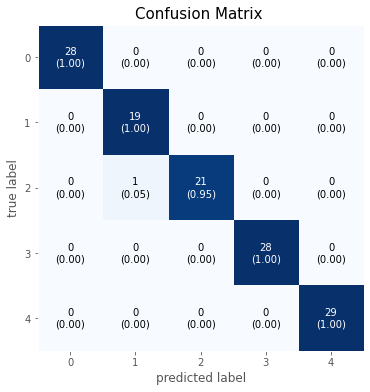

In [17]:
#Decision Tree Classifier - 0

dt_clf0 = DecisionTreeClassifier(max_depth = 3)
dt_clf0.fit(x_train, y_train)
y_pred = dt_clf0.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = dt_clf0.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy: ", train_acc)
evaluator(y_test, y_pred)

Training accuracy:  1.0
Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



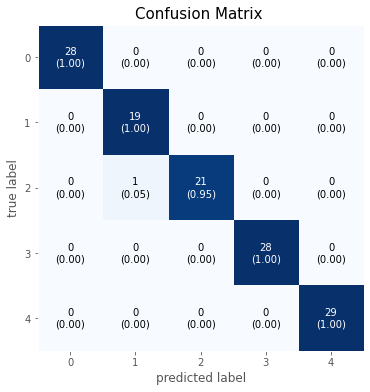

In [18]:
#Decision Tree Classifier - 1

dt_clf1 = DecisionTreeClassifier(min_samples_split = 3)
dt_clf1.fit(x_train, y_train)
y_pred = dt_clf1.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = dt_clf1.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy: ", train_acc)
evaluator(y_test, y_pred)

Training accuracy:  0.998015873015873
Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



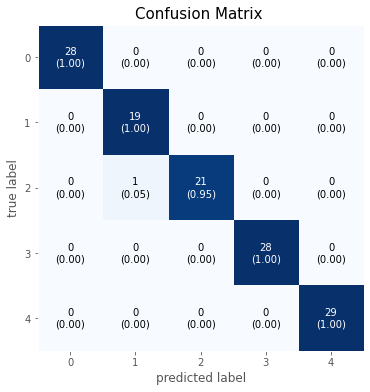

In [19]:
#Decision Tree Classifier - 2

dt_clf2 = DecisionTreeClassifier(min_samples_leaf = 3)
dt_clf2.fit(x_train, y_train)
y_pred = dt_clf2.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = dt_clf2.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy: ", train_acc)
evaluator(y_test, y_pred)

Training accuracy:  0.998015873015873
Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



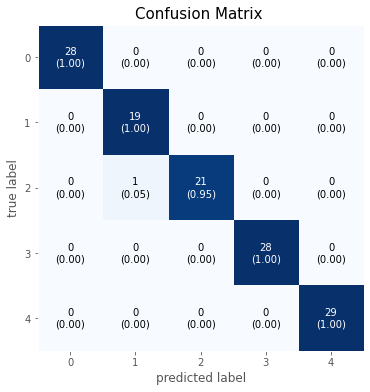

In [20]:
#Decision Tree Classifier - 3

dt_clf3 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.1)
dt_clf3.fit(x_train, y_train)
y_pred = dt_clf3.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = dt_clf3.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy: ", train_acc)
evaluator(y_test, y_pred)

Training accuracy:  0.998015873015873
Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



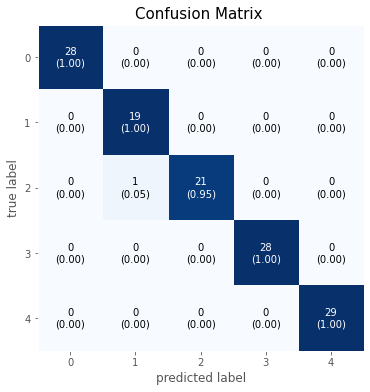

In [21]:
#Decision Tree Classifier - 4

dt_clf4 = DecisionTreeClassifier(max_leaf_nodes = 5)
dt_clf4.fit(x_train, y_train)
y_pred = dt_clf4.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = dt_clf4.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy: ", train_acc)
evaluator(y_test, y_pred)

Training accuracy:  0.998015873015873
Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



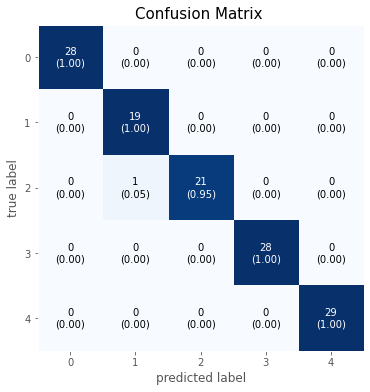

In [22]:
#Decision Tree Classifier - 5

dt_clf5 = DecisionTreeClassifier(max_depth = 3, min_samples_split=3, min_samples_leaf=3, min_weight_fraction_leaf=0.1, max_leaf_nodes=5)
dt_clf5.fit(x_train, y_train)
y_pred = dt_clf5.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = dt_clf5.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy: ", train_acc)
evaluator(y_test, y_pred)

In [23]:
#estimating the Cross Validation Accuracy Score of various classifier
clfs = [dt_clf, dt_clf0, dt_clf1, dt_clf2, dt_clf3, dt_clf4, dt_clf5]

for clf in clfs:
    scores = cross_val_score(clf, x, y , scoring="accuracy", cv=10)
    print(clf)
    for score in scores:
        print(score)
    print("\n\n","_"*100,"\n\n",sep="")

DecisionTreeClassifier()
0.9682539682539683
0.9682539682539683
1.0
0.9682539682539683
0.9841269841269841
0.9841269841269841
1.0
1.0
1.0
1.0


____________________________________________________________________________________________________


DecisionTreeClassifier(max_depth=3)
0.7619047619047619
0.7619047619047619
1.0
0.9682539682539683
0.9841269841269841
0.7777777777777778
0.7936507936507936
0.7936507936507936
0.7936507936507936
0.7936507936507936


____________________________________________________________________________________________________


DecisionTreeClassifier(min_samples_split=3)
0.9682539682539683
0.9841269841269841
1.0
0.9523809523809523
0.9841269841269841
0.9841269841269841
1.0
1.0
1.0
1.0


____________________________________________________________________________________________________


DecisionTreeClassifier(min_samples_leaf=3)
0.9682539682539683
0.9841269841269841
1.0
0.9523809523809523
0.9841269841269841
0.9841269841269841
1.0
1.0
1.0
1.0


_______________

In [24]:
#checking the results of various classifiers for the same data
for clf in clfs:
    print(clf)
    prediction = clf.predict((np.array([[93.80,
                                       25.680,
                                       91.840,
                                       16.6,
                                       89.84,
                                       99.6,
                                       1.840,
                                       74.20]])))
    print("The Stress for given Conditions is :", prediction)
    print()

DecisionTreeClassifier()
The Stress for given Conditions is : [3]

DecisionTreeClassifier(max_depth=3)
The Stress for given Conditions is : [3]

DecisionTreeClassifier(min_samples_split=3)
The Stress for given Conditions is : [3]

DecisionTreeClassifier(min_samples_leaf=3)
The Stress for given Conditions is : [3]

DecisionTreeClassifier(min_weight_fraction_leaf=0.1)
The Stress for given Conditions is : [3]

DecisionTreeClassifier(max_leaf_nodes=5)
The Stress for given Conditions is : [3]

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, min_samples_leaf=3,
                       min_samples_split=3, min_weight_fraction_leaf=0.1)
The Stress for given Conditions is : [3]



_________
Grid Search for Best Estimator

In [25]:
#parameter for grid search to get best combination of hyperparameter values
param_grid = [
 {'max_depth': [2, 3, 4, 5], 'min_samples_split': [3, 5, 10, 15, 20],
 'min_samples_leaf': [3, 5, 10, 15, 20], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5], 'max_leaf_nodes': [3, 5, 10]}
 ]

In [26]:
#Grid Search
grid_search = GridSearchCV(dt_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5],
                          'max_leaf_nodes': [3, 5, 10],
                          'min_samples_leaf': [3, 5, 10, 15, 20],
                          'min_samples_split': [3, 5, 10, 15, 20],
                          'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4,
                                                       0.5]}],
             return_train_score=True, scoring='accuracy')

In [27]:
#best parameters
grid_search.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.1}

In [28]:
#best decision tree estimator
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, min_samples_leaf=15,
                       min_samples_split=3, min_weight_fraction_leaf=0.1)

Training accuracy:  0.998015873015873
Accuracy is:  0.9920634920634921

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Confusion Matrix: 



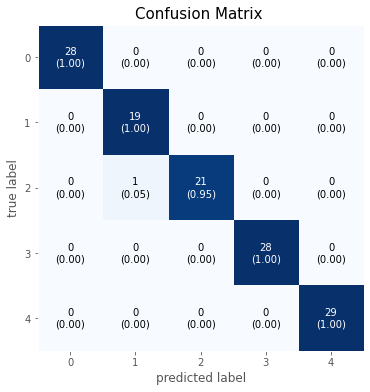

In [29]:
#Evaluating Decision Tree obtained using Grid Search
dt_clf_gs = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.1)
dt_clf_gs.fit(x_train, y_train)
y_pred = dt_clf_gs.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = dt_clf_gs.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training accuracy: ", train_acc)
evaluator(y_test, y_pred)

In [30]:
#Cross Validation Accuracy Scores of Decision Tree obtained using Grid Search
scores = cross_val_score(dt_clf_gs, x, y , scoring="accuracy", cv=10)
print(dt_clf_gs)
for score in scores:
    print(score)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.1)
0.9682539682539683
0.9682539682539683
1.0
0.9682539682539683
0.9841269841269841
0.9841269841269841
1.0
1.0
1.0
1.0


In [31]:
#Scores and Errors of Decision Tree obtained using Grid Search

print(f"Score: {dt_clf.score(x_test, y_test)}")

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.4f" % mae)
 
R2 = r2_score(y_test, y_pred)
print("R2: %.4f" % R2)

Score: 0.9920634920634921
MSE: 0.0079
MAE: 0.0079
R2: 0.9964


In [ ]:
#prediction
prediction = dt_clf_gs.predict((np.array([[91.6400,
25.1040,
91.5520,
15.8800,
89.5520,
98.8800,
1.5520,
72.7600,
]])))
print("The Stress for given Conditions is :", prediction)

In [33]:
#export the Decision Tree structure
export_graphviz(
 dt_clf_gs,
 out_file=os.path.join(".","dt_graph_gs.dot"),
 feature_names=list(df.columns)[:-1],
 class_names=['0','1','2','3','4'],
 rounded=True,
 filled=True
 )

____________
Saving the model using Pickle

In [34]:
#creating a final classifier
classifier = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, min_weight_fraction_leaf=0.1)
classifier.fit(x,y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.1)

In [35]:
#dumping model through pickle
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename,'wb'))
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [10]:
#testing saved model
prediction = loaded_model.predict((np.array([[85.7600,
23.5360,
90.7680,
13.9200,
88.7680, 
96.9200,
0.7680,
68.8400
]])))
print("The Stress for given Conditions is :", prediction)

The Stress for given Conditions is : [0]


C:\Users\msari\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


___________
Done
_________